In [21]:
import pandas as pd
import numpy as np
import math 
from scipy.special import comb
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import seaborn as sns
from sympy import *

# Punto 4 

## Gráfica de funciones de masa de probabilidad 

### Variable Aleatoria Uniforme


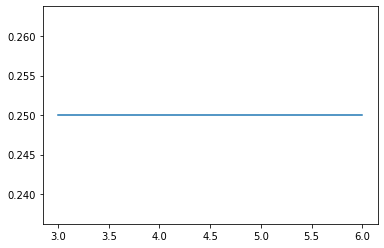

In [14]:
def uniforme (x): 
    a = min(x)
    b = max(x)
    respuesta = [1/(b-a+1) for i in x ]
    return respuesta

a = 3 
b = 6
x = np.linspace(a,b,100)

plt.plot(x, uniforme(x))

### Variable Aleatoria Bernoulli

([<matplotlib.axis.XTick at 0x1c78615d030>,
 [Text(0, 0, ''), Text(0, 0, '')])

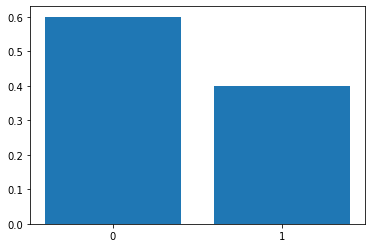

In [19]:
def bernoulli (x , p):
    respuesta = [p if i == 1 else 1-p for i in x]
    return respuesta

x = [0 , 1]
p = 0.4
plt.bar(x, bernoulli(x,p))
plt.xticks(x)

### Variable Aleatoria Binomial

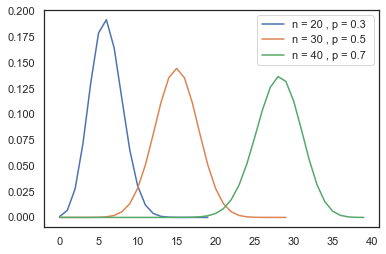

In [64]:
def distBinomial(K,n,p):
    respuesta = [comb(n,k) *(p**k) *((1-p)**(n-k)) for k in K]
    return respuesta

sns.color_palette('Paired' )
sns.set(style = 'white')
sns.despine ()


# n = 100

# p = 0.5
# P = np.arange(0.1,0.9,0.3)
P = [0.3 , 0.5 , 0.7]
N = [20 , 30 , 40]

for p,n in zip(P, N) :
    K  = np.arange(0,n)
    plt.plot(K , distBinomial(K,n,p), label = f'n = {n} , p = {p} ')

plt.legend()

### Variable Aleatoria Geometrica

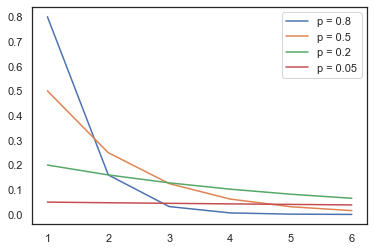

In [77]:
def distGeometrica (K , p ) : 
    respuesta = [p * (1-p)**(k-1) for k in K]
    return respuesta

K = np.arange(1,7)
p = 0.8
P = [0.8 , 0.5 , 0.2 , 0.05]

for p in  P :
    plt.plot(K , distGeometrica(K , p) , label = f'p = {p}')

plt.legend()

### Variable Aleatoria Poisson

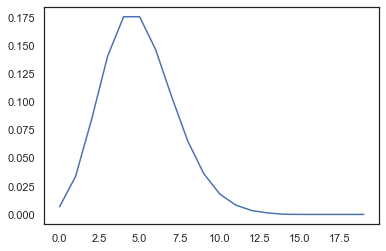

In [88]:
def poission (K , lmb):
  return  [exp(-lmb) * ((lmb**k) / (np.math.factorial(k))) for k in K]


lmb = 5
K = np.arange(0,20)


plt.plot(K , poission(K , lmb))

# Punto 5 . 

El archivo dataCaso2.txt contiene los valores de una variable aleatoria para 10000 repeticiones
de un experimento aleatorio. De esta variable aleatoria sólo se sabe que puede ser Uniforme, Geométrica
o de Poisson. Utilizando estos datos, determine la frecuencia relativa de cada uno de los valores que esta
variable aleatoria toma. No puede utilizar funciones predeterminadas para calcular o graficar histogramas
en este caso de estudio. Determine, a ojo, la función de masa de probabilidad que usted crea mejor se le
ajustaría. En una figura, muestre las gráficas traslapadas de las frecuencias relativas y esa función de masa de
probabilidad que usted sugiere es la que mejor se aproxima.



In [7]:
#Se leen los datos
data = open('dataCaso2.txt').read().split("   ")
data = [float(x)  for x in data  if bool(x)]

### - Se crea la serie de datos de frecuencia relativa de los valores unicos de la data 
Se crea un diccionario el cual contiene como llaves los valores unicos de la lista de datos obtenidos , 
Y como valores el conteo de cada uno de esos valores unicos dividido entre el total de datos que se tienen.

In [8]:
distribucionRelativa = { i : data.count(i)/len(data) for i in list(set(data)) }
distribucionRelativa_Series = pd.Series(distribucionRelativa)

### Se realiza la gráfca de los datos obtenidos:

<BarContainer object of 29 artists>

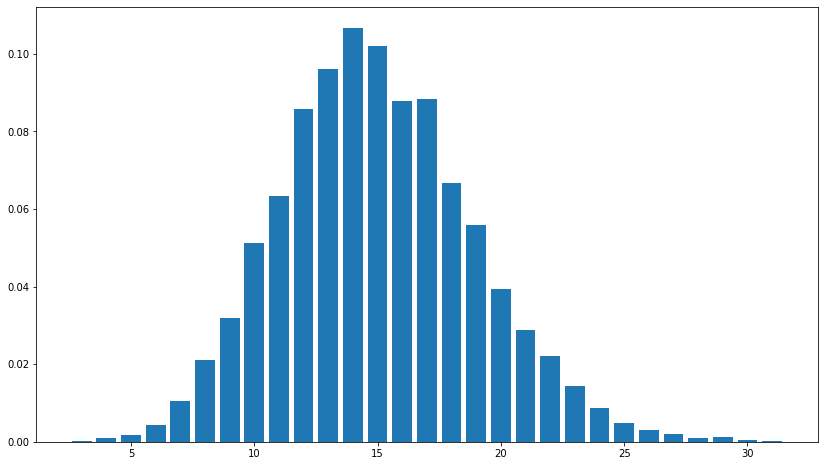

In [9]:
fig , ax = plt.subplots(figsize = (14,8))
plt.bar(distribucionRelativa_Series.index , distribucionRelativa_Series.values)